# Riiid! Answer Correctness Prediction
## In this starter notebook, we will do EDA to understand the data better

(This is still a work in progress, I am still trying to analyze the data in several ways to gain a better understanding)

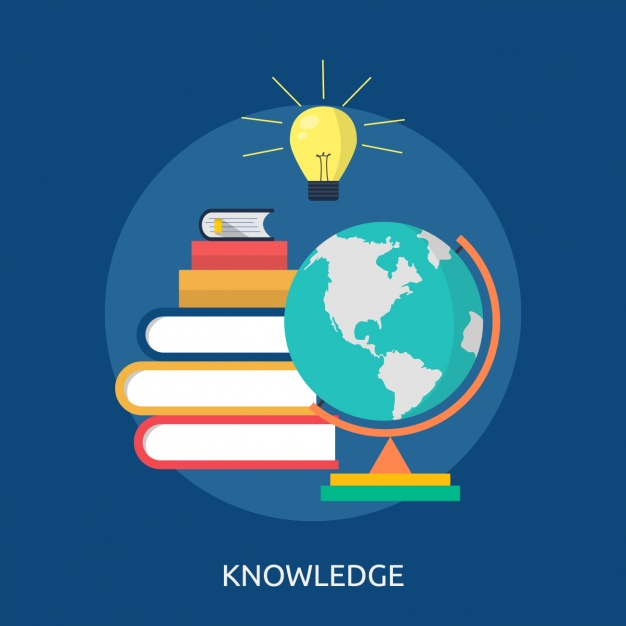

Image taken from: https://www.freepik.com/free-vector/knowledge-background-design_1016133.htm

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>
    
[0. Understanding Our Data (Univariate)](#0)
* [0.0 Check for missing values](#0.0)
* [0.1 Timestamp](#0.1)
* [0.2 User Events](#0.2)
* [0.3 Content Id](#0.3)
* [0.4 Content Type Id](#0.4)
* [0.5 Task Container Id](#0.5)
* [0.6 User Answers](#0.6)
    
[1. Exploring Multivariate Relationships](#1)
* [1.0 Prior question elapsed time against answered correctly](#1.0)
* [1.1 Prior question had explanation against answered correctly](#1.1)

First let's import the module and create an environment.

In [ ]:
import riiideducation
import pandas as pd

# You can only call make_env() once, so don't lose it!
env = riiideducation.make_env()

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Training data is in the competition dataset as usual
It's larger than will fit in memory with default settings, so we'll specify more efficient datatypes and only load a subset of the data for now.

In [ ]:
train_df = pd.read_csv('/kaggle/input/riiid-test-answer-prediction/train.csv', low_memory=False, nrows=10**5, 
                       dtype={'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16', 'content_type_id': 'int8',
                              'task_container_id': 'int16', 'user_answer': 'int8', 'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32', 
                             'prior_question_had_explanation': 'boolean',
                             }
                      )
train_df

<a id="0"></a>
## Understanding Our Data (Univariate)

<a id="0.0"></a>
### Check for missing values:
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    

display_missing(train_df)

<a id="0.1"></a>
### Timestamp
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

Let's look at timestamp

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.hist(train_df['timestamp'], bins = 40)
ax1.set_ylabel('Frequency')
ax1.set_xlabel("Timestamp")
plt.show()

Timestamp is left skewed, many of the attempts were completed early with a questions being answered later

<a id="0.2"></a>

### User Events
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.hist(train_df.user_id.value_counts(), bins = 20)
ax1.set_ylabel('Frequency')
ax1.set_xlabel("Number of user events")
plt.show()

Number of user events by students are also left skewed

In [ ]:
train_df.user_id.value_counts()

There are 349 students in our sampled data

<a id="0.3"></a>

### Content Id
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
train_df.content_id.value_counts()

There are 11532 different user interactions in our sampled data

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.hist(train_df.content_id.value_counts(), bins = 20)
ax1.set_ylabel('Frequency')
ax1.set_xlabel("Counts of user interactions")
plt.show()

Most user interactions happen infrequently

<a id="0.4"></a>
### Content Type Id
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
sns.countplot(x='content_type_id', data=train_df)

In [ ]:
train_df.content_type_id.value_counts()

Most of the time, question is being posed to user. For other times, user was watching a lecture.

<a id="0.5"></a>
### Task Container Id
---

Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id. Monotonically increasing for each user.

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
train_df.task_container_id.value_counts()

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.hist(train_df.task_container_id.value_counts(), bins = 20)
ax1.set_ylabel('Frequency')
ax1.set_xlabel("Occurence of batch of questions")
plt.show()

Most occurence for batch of questions happen infrequently

<a id="0.6"></a>
### User Answers
---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
train_df.user_answer.value_counts()

```user_answer``` is the user's answer to the question, -1 corresponds to no answer (user is watching lecture). <ins> Note that user answers will actually be dependent on question posed </ins>

<a id="1"></a>
## Exploring Multivariate Relationships

Let's check prior question elapsed time against answered correctly

<a id="1.0"></a>
### Prior question elapsed time against answered correctly
---


<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.catplot(x="answered_correctly", y="prior_question_elapsed_time",
            kind="violin", data=train_df)

Users who answered correctly have a lower median prior question elapsed time, but otherwise, we cannot easily seperate answers that are correct and wrong based on prior question elapsed time

<a id="1.1"></a>
### Prior question had explanation against answered correctly
---


<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOC</a>

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x="prior_question_had_explanation", hue="answered_correctly", data=train_df)

Interesting for prior questions that had explanations, they tend to have more correct answers (proportionally and countwise) than prior questions without explanations

(To be continued)